**Proyek Pertama_Predictive Analytics**


Nama: Aisyah Amelia Zarah Juaita

Cohort ID: MC189D5X0464

Proyek Machine Learning: Klasifikasi Kualitas Wine

Sumber Data: kaggle


## 1. Import Library yang Dibutuhkan

In [1]:
#Import Load data Library
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

# Import train test split
from sklearn.model_selection import train_test_split

# Import Minmaxscaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

#Import Model
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

## 2. Load Data

In [2]:
df = pd.read_csv('/content/wine_data.csv')
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,3
1,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.4,3
2,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,3
3,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,3
4,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3


Fungsi df = pd.read_csv digunakan untuk membaca file CSV dan mengubahnya menjadi sebuah DataFrame pandas, yaitu struktur data tabular seperti tabel yang memudahkan analisis data. '/content/wine_data.csv': Ini adalah path file CSV yang berisi data wine (anggur). Lalu fungsi df.head() untuk menampilkan 5 baris pertama dari DataFrame df untuk melihat sekilas isi data. Output menghasilkan Data ini berisi berbagai fitur kimia dan fisik dari sampel wine, seperti keasaman, kadar gula, kadar alkohol, dll. Setiap baris mewakili satu sampel wine. Kolom terakhir yaitu quality adalah nilai kualitas wine yang biasanya jadi target analisis.

## 3. Exploratory Data Analysis (EDA)

- Mendeskripsikan Variabel dari Dataset

In [3]:
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,3
1,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.4,3
2,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,3
3,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,3
4,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
20995,9.7,1.020,0.91,50.00,0.412,114.6,181.7,1.02085,3.30,0.89,12.0,9
20996,10.2,0.610,0.88,53.80,0.250,62.4,204.7,1.02776,3.52,1.14,9.7,9
20997,13.4,0.460,1.04,52.10,0.449,63.0,273.5,1.02618,2.89,1.76,9.3,9
20998,6.6,1.030,1.09,25.30,0.138,179.8,295.0,1.02476,2.94,1.54,12.9,9


DataFrame diatas memiliki 21.000 baris dan 12 kolom, sebagai berikut:

1. `fixed_acidity` - Keasaman tetap: Asam yang tidak menguap saat proses fermentasi, seperti asam tartarat.

2. `volatile_acidity` - Keasaman yang mudah menguap, seperti asam asetat (bau cuka). Terlalu tinggi = wine rusak.

3. `citric_acid` - Asam sitrat: Menambah rasa segar/keasaman. Jumlah kecil bisa meningkatkan kualitas wine.

4. `residual_sugar` - Gula yang tersisa setelah fermentasi. Wine manis memiliki nilai lebih tinggi.

5. `chlorides` - Kandungan garam (biasanya natrium klorida). Terlalu tinggi = rasa asin/tidak enak.

6. `free_sulfur_dioxide` - SO₂ bebas: Digunakan untuk mencegah pertumbuhan mikroorganisme & oksidasi.

7. `total_sulfur_dioxide` - Total kandungan SO₂ (bebas + terikat). Terlalu banyak = berdampak negatif pada aroma dan rasa.

8. `density` - Kepadatan cairan wine. Dipengaruhi oleh kadar gula, alkohol, dan komposisi kimia lain.

9. `pH` - Tingkat keasaman (skala 0-14). pH rendah = asam tinggi.

10. `sulphates` - Tambahan sulfat untuk mengawetkan dan menstabilkan wine. Bisa juga memengaruhi rasa.

11. `alcohol` - Persentase kandungan alkohol dalam wine. Biasanya berkisar antara 8-14%.

12. `quality` - Skor kualitas wine, biasanya diberikan oleh panel uji rasa (skala 0-10). Target untuk model.

- Menampilkan Describe dari Dataset

In [4]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,9.797079,0.774796,0.793870,31.289348,0.200245,129.442333,229.008762,1.009972,3.158712,1.020641,11.291716,6.000000
std,2.413919,0.365015,0.384833,19.015391,0.124933,77.167262,100.183265,0.012032,0.171371,0.408304,1.182198,2.000048
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,7.600000,0.430000,0.410000,9.800000,0.072000,45.000000,150.000000,0.997417,3.030000,0.620000,10.400000,4.000000
50%,10.000000,0.830000,0.870000,37.600000,0.205000,145.800000,240.500000,1.012200,3.150000,1.080000,11.300000,6.000000
75%,11.800000,1.080000,1.110000,46.800000,0.298000,194.325000,311.625000,1.019840,3.270000,1.360000,12.200000,8.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Fungsi df.describe() memberikan statistik deskriptif untuk setiap kolom numerik di DataFrame. Sangat berguna untuk memahami sebaran, nilai rata-rata, variasi, dan mendeteksi potensi outlier dalam dataset. Yang diantaranya:

1. `count` - Jumlah data non-null (semua = 21.000, berarti tidak ada missing value)

2. `mean` - Nilai rata-rata dari kolom.

3. `std` - Standar deviasi: ukuran penyebaran data terhadap rata-rata.

4. `min` - Nilai minimum.

5. `25%` - Kuartil pertama (Q1): 25% data berada di bawah nilai ini.

6. `50% (median)` - Kuartil kedua (Q2): nilai tengah (50% data di bawah dan 50% di atas).

7. `75%` - Kuartil ketiga (Q3): 75% data berada di bawah nilai ini.

8. `max` - Nilai maksimum.

- Menampilkan Informasi dari Dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         21000 non-null  float64
 1   volatile_acidity      21000 non-null  float64
 2   citric_acid           21000 non-null  float64
 3   residual_sugar        21000 non-null  float64
 4   chlorides             21000 non-null  float64
 5   free_sulfur_dioxide   21000 non-null  float64
 6   total_sulfur_dioxide  21000 non-null  float64
 7   density               21000 non-null  float64
 8   pH                    21000 non-null  float64
 9   sulphates             21000 non-null  float64
 10  alcohol               21000 non-null  float64
 11  quality               21000 non-null  int64  
dtypes: float64(11), int64(1)
memory usage: 1.9 MB


Fungsi df.info() adalah Menampilkan struktur DataFrame, Melihat jumlah baris, kolom, dan tipe data masing-masing kolom, Mengetahui apakah ada missing values, Menampilkan penggunaan memori. Dari data di atas dapat disimpulkan bahwa:
1. Jumlah Datanya ada 21.000 dan memiliki 12 kolom.
2. Memiliki tipe data `float` ada 11 kolom, dan tipe data `int` ada 1 kolom (quality, skor kualitas).

- Menampilkan Jumlah dari Baris dan Kolom

In [6]:
df.shape

(21000, 12)

Fungsi df.shape adalah properti dari DataFrame pandas yang menunjukkan dimensi data, yang dapat berupa jumlah baris dan juga jumlah kolom.

- Melihat apakah ada Data Duplikat atau tidak

In [7]:
df.duplicated().sum()

np.int64(6060)

Ternyata setelah dilakukan pengecekkan duplikat, terdapat (6060) yang duplikat.

- Membersihkan Data yang Duplikat

In [8]:
df_clean = df.drop_duplicates()

In [9]:
df_clean.duplicated().sum()

np.int64(0)

Setelah dilakukan pembersihan, menghasilkan (0) yang dimana tidak terdapat data yang duplikasi.

- Melihat Missing Value

In [10]:
df.isnull().sum()

,0
fixed_acidity,0
volatile_acidity,0
citric_acid,0
residual_sugar,0
chlorides,0
free_sulfur_dioxide,0
total_sulfur_dioxide,0
density,0
pH,0
sulphates,0


Ternyata tidak terdapat missing value di dalam data tersebut.

- Melihat Proporsi pada kolom quality

In [11]:
df.quality.value_counts(normalize=True)

,proportion
quality,
3,0.142857
4,0.142857
5,0.142857
6,0.142857
7,0.142857
8,0.142857
9,0.142857


Dapat disimpulkan bahwa dataset memiliki kelas quality yang seimbang, masing-masing skor kualitas (3-9) muncul sebanyak 14.29% dari total data (21.000).

## 4. Penanganan Outlier

In [12]:
# Buat salinan data
df_clean = df.copy()

# Hilangkan kolom target dari kolom numerik yang akan dianalisis
numerical_cols = df_clean.drop(columns=['quality']).select_dtypes(include=['float64', 'int64']).columns

# Proses penghapusan outlier dengan metode IQR
for col in numerical_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

# Cek hasil
print(f"Jumlah data awal: {len(df)}")
print(f"Jumlah data setelah menghapus outlier: {len(df_clean)}")

Jumlah data awal: 21000
Jumlah data setelah menghapus outlier: 20889


Penanganan Outlier ini yaitu Melakukan pembersihan data dengan cara menghapus outlier (nilai pencilan) dari semua kolom numerik kecuali kolom quality menggunakan metode IQR (Interquartile Range). Yang dimana dari 21.000 baris data awal, sebanyak 111 baris dianggap outlier dan dihapus, dan data sekarang bersih dari nilai pencilan yang ekstrem berdasarkan IQR.



In [13]:
df_clean.shape

(20889, 12)

Setelah dilakukannya outlier memiliki 20889 baris dan 12 kolom.

## 5. Univariate Analysis

In [14]:
# Tentukan kolom kategorikal dan numerikal
categorical_cols = ['quality']
numerical_cols = [
    'fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
    'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide',
    'density', 'pH', 'sulphates', 'alcohol'
]

Berikut mengetahui kolom kategorikal dan numerikal.

In [15]:
# Summary statistics numerikal
print("=== Summary Statistics (Numerikal) ===")
print(df[numerical_cols].describe().T)

=== Summary Statistics (Numerikal) ===
                        count        mean         std      min         25%  \
fixed_acidity         21000.0    9.797079    2.413919  3.80000    7.600000   
volatile_acidity      21000.0    0.774796    0.365015  0.08000    0.430000   
citric_acid           21000.0    0.793870    0.384833  0.00000    0.410000   
residual_sugar        21000.0   31.289348   19.015391  0.60000    9.800000   
chlorides             21000.0    0.200245    0.124933  0.00900    0.072000   
free_sulfur_dioxide   21000.0  129.442333   77.167262  1.00000   45.000000   
total_sulfur_dioxide  21000.0  229.008762  100.183265  6.00000  150.000000   
density               21000.0    1.009972    0.012032  0.98711    0.997417   
pH                    21000.0    3.158712    0.171371  2.72000    3.030000   
sulphates             21000.0    1.020641    0.408304  0.22000    0.620000   
alcohol               21000.0   11.291716    1.182198  8.00000   10.400000   

                        

Berikut adalah kode dan output statistik dari kolom numerikal, yang dimanan menghasilkan jumlah dari count, mean,std,min, 25%, 50%, 75%, dan max.

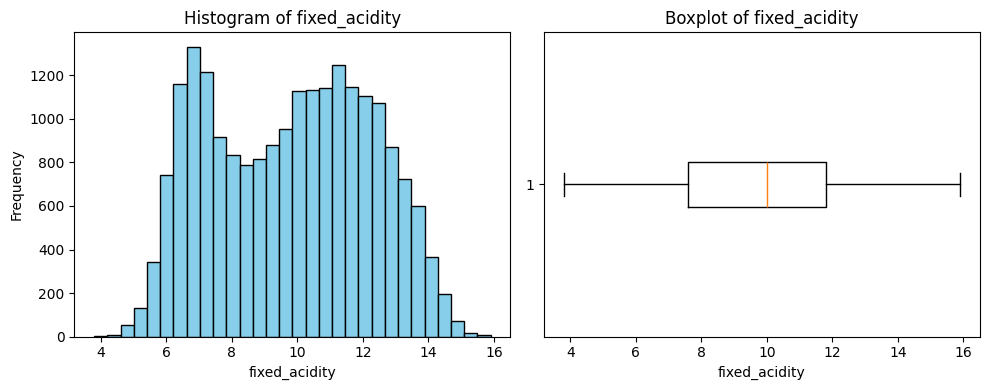

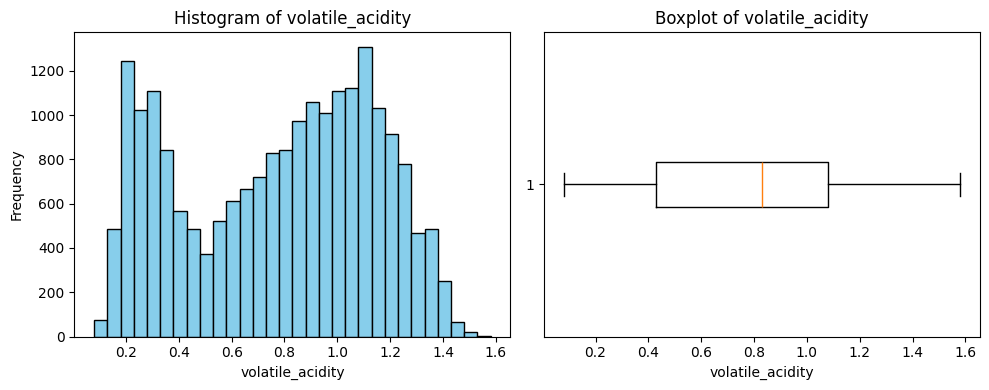

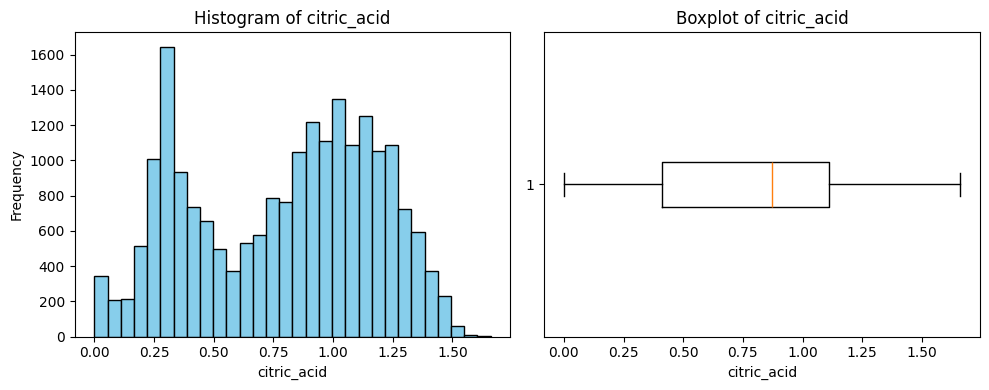

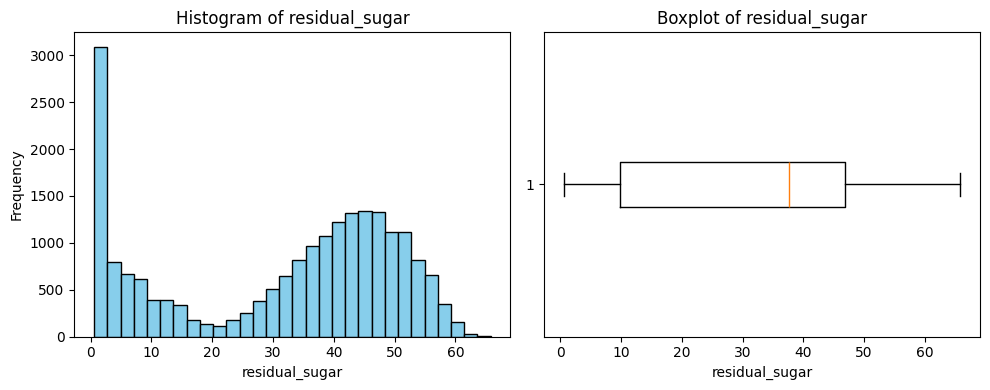

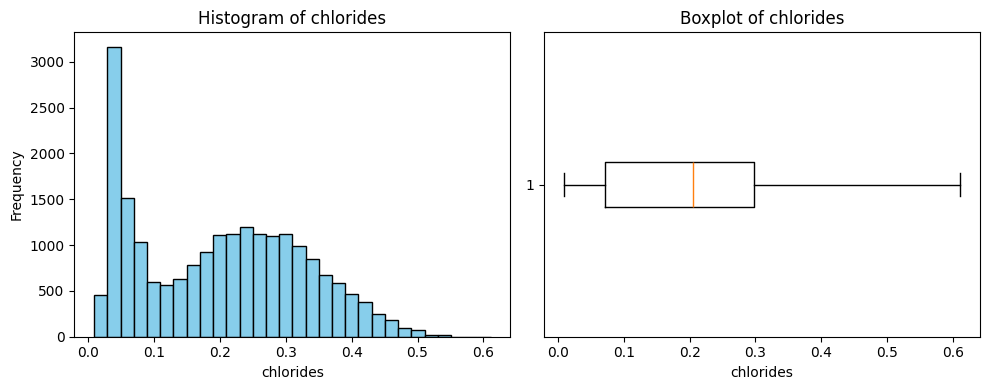

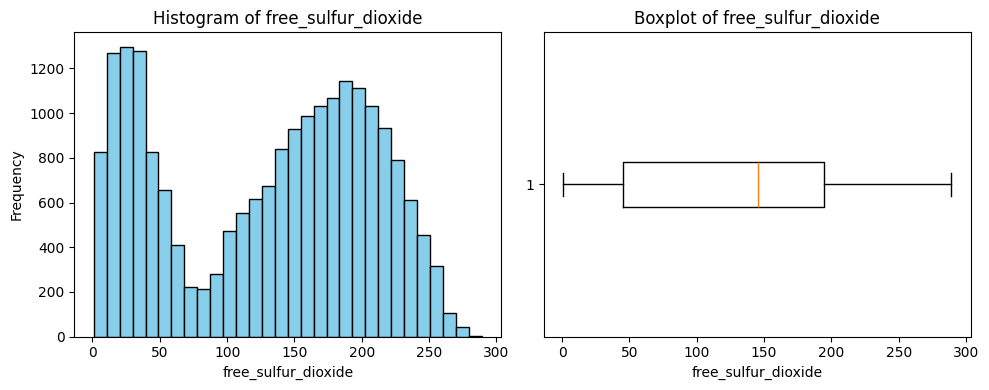

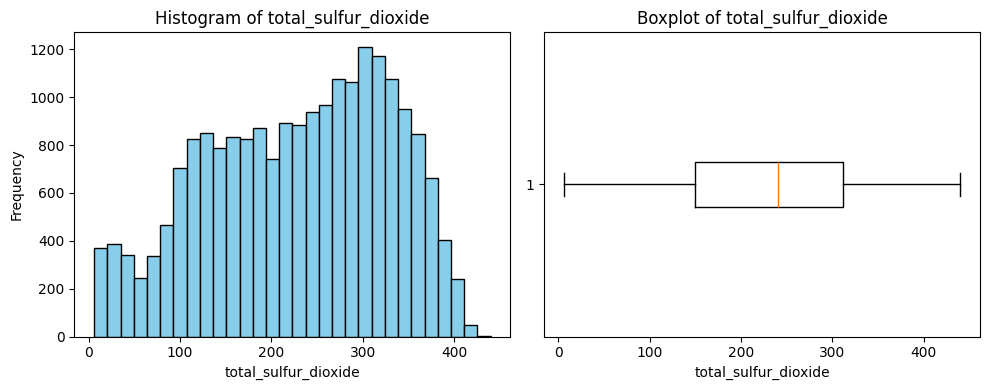

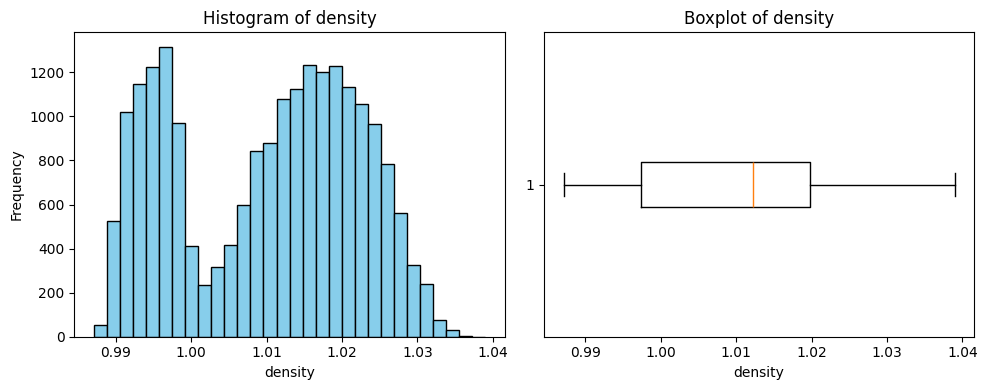

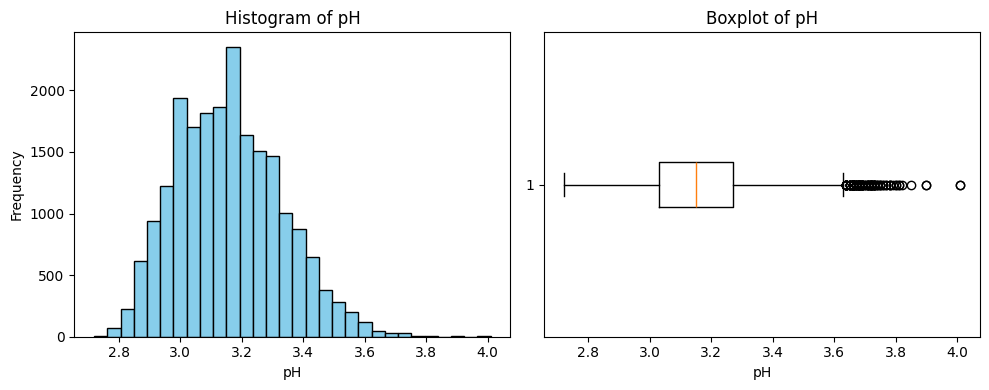

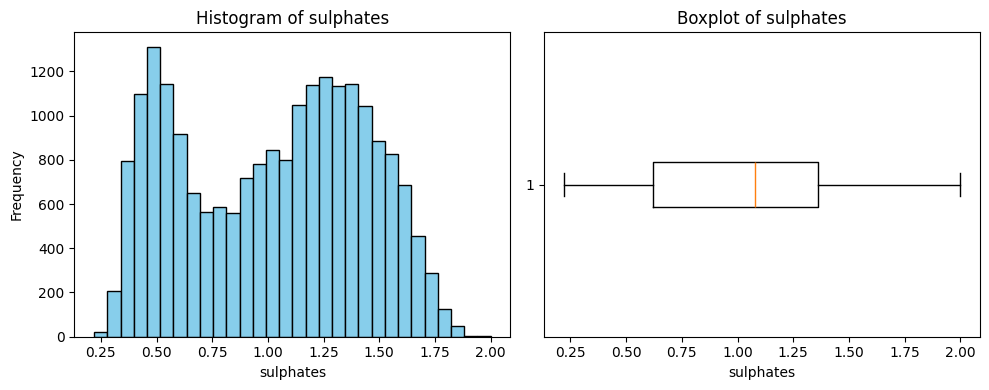

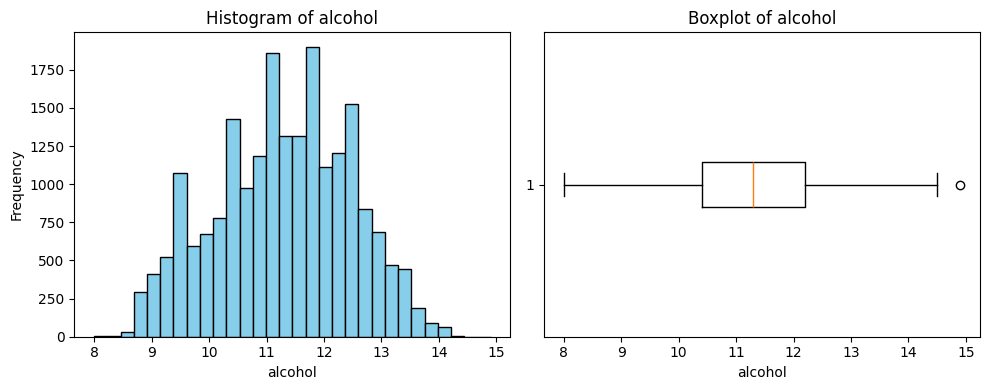

In [16]:
# Visualisasi kolom numerikal: histogram & boxplot
for col in numerical_cols:
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    # Histogram
    axes[0].hist(df[col], bins=30, edgecolor='k', color='skyblue')
    axes[0].set_title(f'Histogram of {col}')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Frequency')

    # Boxplot
    axes[1].boxplot(df[col], vert=False)
    axes[1].set_title(f'Boxplot of {col}')
    axes[1].set_xlabel(col)

    plt.tight_layout()
    plt.show()

Kode dan output tersebut digunakan untuk visualisasi univariate  dari fitur numerik dalam DataFrame df, dengan menampilkan dua jenis grafik untuk setiap kolom numerik histogram dan boxplot. Histogram dan boxplot ini menghasilkan output yang Menunjukkan distribusi frekuensi data dan Menunjukkan persebaran data melalui nilai kuartil.

In [17]:
# Summary statistics kategorikal
print("\n=== Summary Statistics (Kategorikal) ===")
for col in categorical_cols:
    print(f"\nDistribusi nilai untuk {col}:")
    print(df[col].value_counts())
    print(f"\nProporsi nilai untuk {col}:")
    print(df[col].value_counts(normalize=True))


=== Summary Statistics (Kategorikal) ===

Distribusi nilai untuk quality:
quality
3    3000
4    3000
5    3000
6    3000
7    3000
8    3000
9    3000
Name: count, dtype: int64

Proporsi nilai untuk quality:
quality
3    0.142857
4    0.142857
5    0.142857
6    0.142857
7    0.142857
8    0.142857
9    0.142857
Name: proportion, dtype: float64


Kode dan output diatas digunakan untuk menampilkan distribusi dan proporsi nilai pada kolom kategorikal `quality`. Hasilnya menunjukkan bahwa setiap nilai kualitas dari 3 hingga 9 muncul sebanyak 3.000 kali, sehingga distribusinya merata. Proporsi masing-masing kelas adalah 14,29%, yang menunjukkan bahwa data kategori ini seimbang dan tidak perlu penyesuaian khusus sebelum analisis atau pemodelan.


<ipython-input-18-679657855786>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')


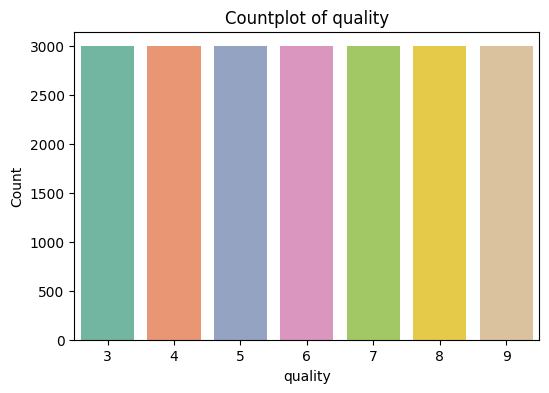

In [18]:
# Visualisasi kolom kategorikal
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df, palette='Set2')
    plt.title(f'Countplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

Pada kode digunakan untuk membuat visualisasi distribusi data pada kolom kategorikal menggunakan countplot dari library Seaborn. Dalam hal ini, kolom `quality` divisualisasikan untuk menunjukkan jumlah data pada setiap kategori nilai kualitas anggur. Karena data seimbang, grafik yang dihasilkan menunjukkan tinggi batang (bar) yang sama untuk setiap nilai `quality` dari 3 hingga 9. Visualisasi ini membantu dalam memahami seberapa banyak data yang dimiliki setiap kategori dan mengecek apakah terjadi ketidakseimbangan kelas.

## 6. Multivariate Analysis

In [19]:
# Tentukan kolom
categorical_cols = ['quality']
numerical_cols = [
    'fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
    'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide',
    'density', 'pH', 'sulphates', 'alcohol'
]

Berikut menentukan mana kolom kategorikal dan numerikal.

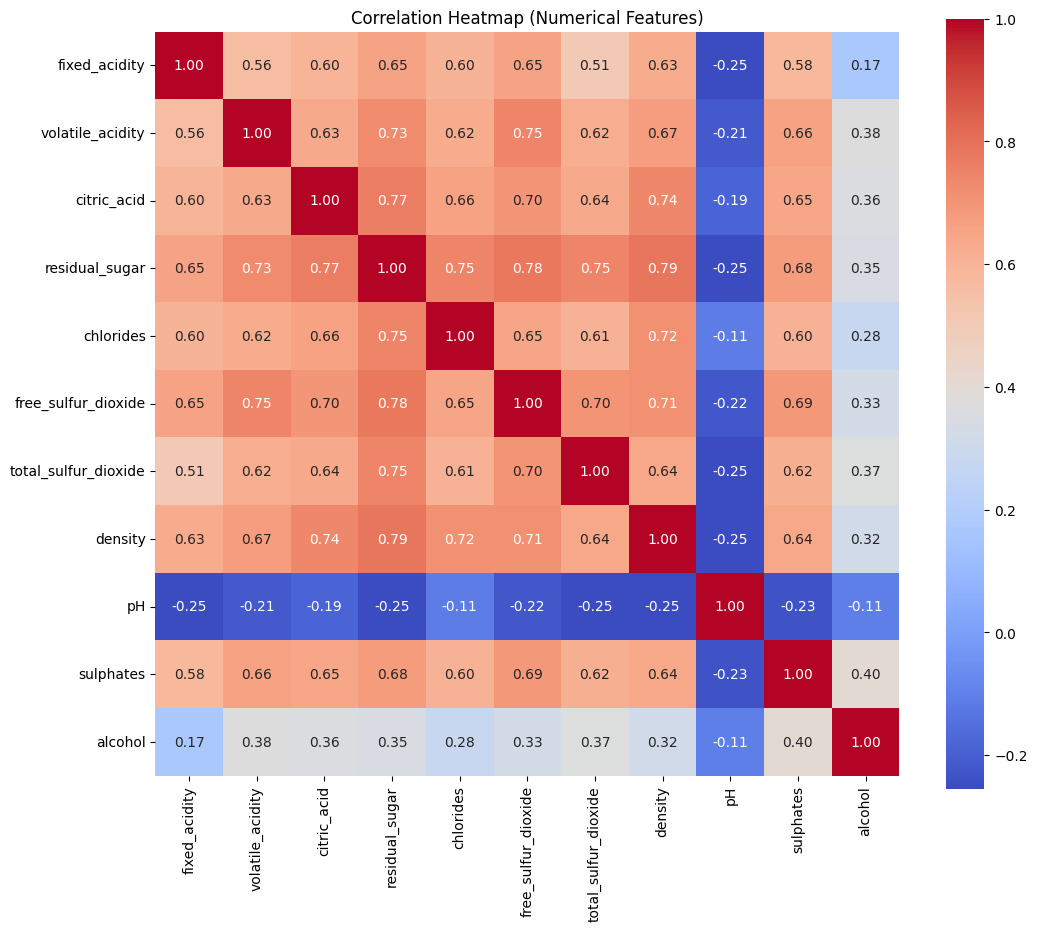

In [20]:
# Korelasi antar fitur numerik
plt.figure(figsize=(12, 10))
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap (Numerical Features)')
plt.show()

Berikut menampilkan korelasi antar fitur numerik dalam bentuk heatmap (peta korelasi). Korelasi ini dihitung menggunakan metode Pearson dan menunjukkan hubungan linier antara setiap pasangan fitur numerik dalam dataset. Hasilnya membantu kita melihat fitur mana yang saling berkorelasi kuat (positif atau negatif).

<ipython-input-21-5310378b14bb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y=col, data=df, palette='Set3')


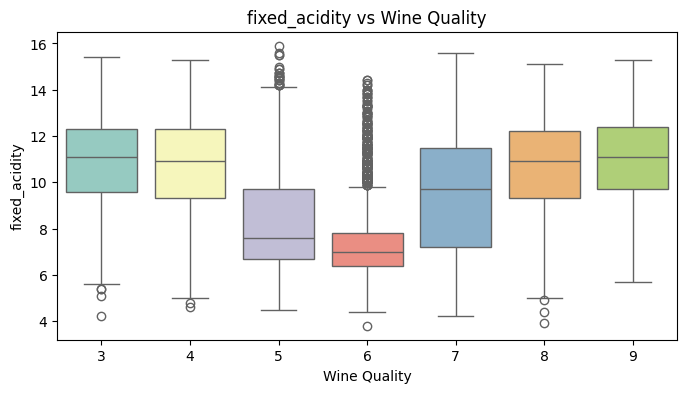

<ipython-input-21-5310378b14bb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y=col, data=df, palette='Set3')


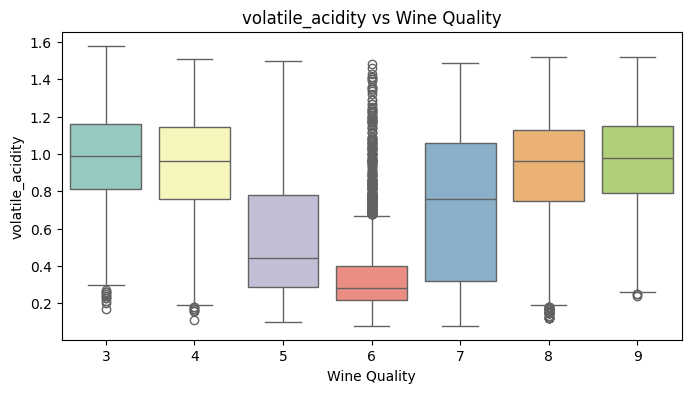

<ipython-input-21-5310378b14bb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y=col, data=df, palette='Set3')


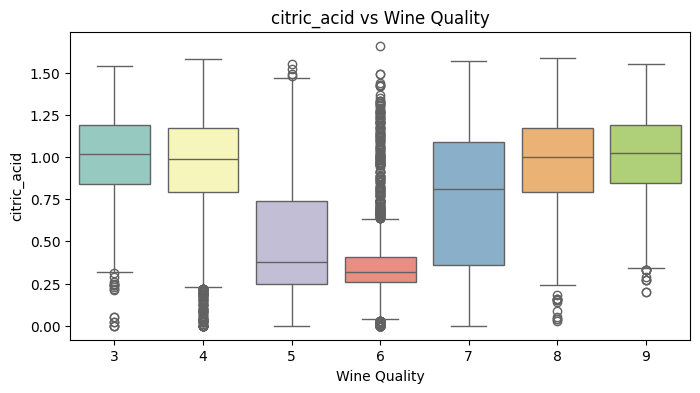

<ipython-input-21-5310378b14bb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y=col, data=df, palette='Set3')


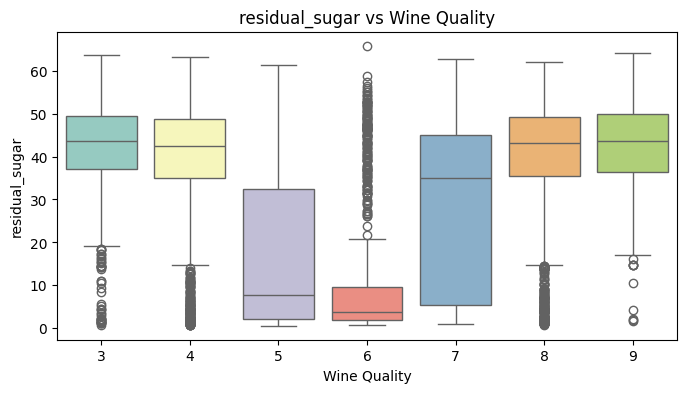

<ipython-input-21-5310378b14bb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y=col, data=df, palette='Set3')


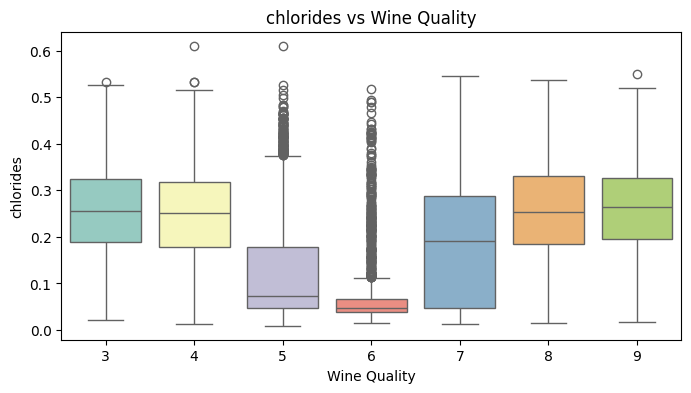

<ipython-input-21-5310378b14bb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y=col, data=df, palette='Set3')


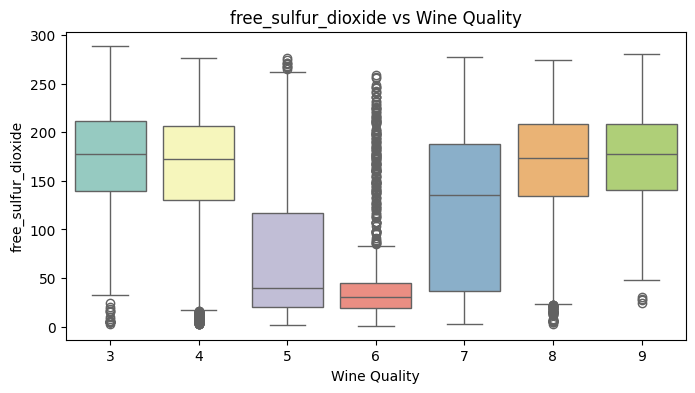

<ipython-input-21-5310378b14bb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y=col, data=df, palette='Set3')


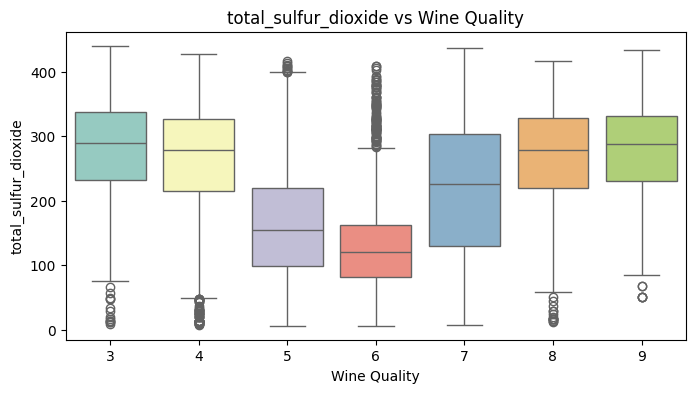

<ipython-input-21-5310378b14bb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y=col, data=df, palette='Set3')


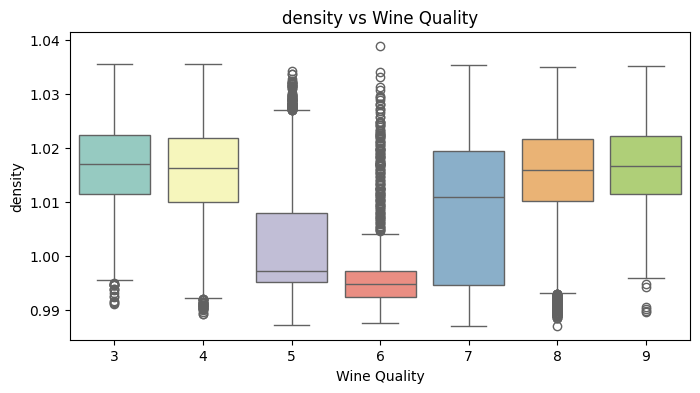

<ipython-input-21-5310378b14bb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y=col, data=df, palette='Set3')


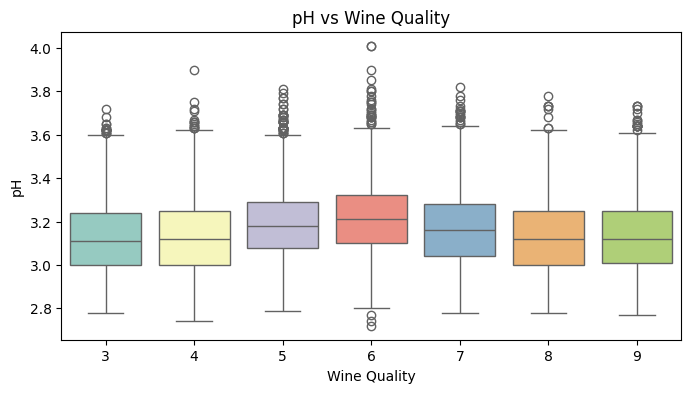

<ipython-input-21-5310378b14bb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y=col, data=df, palette='Set3')


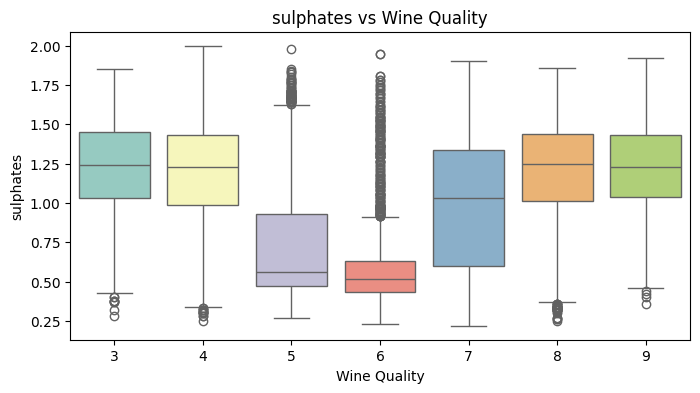

<ipython-input-21-5310378b14bb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y=col, data=df, palette='Set3')


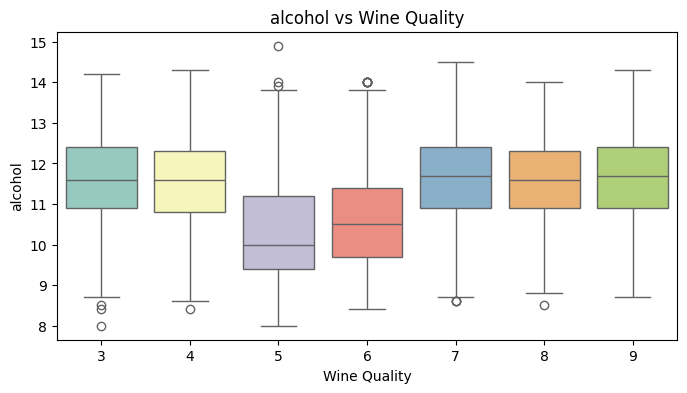

In [21]:
# Boxplot: Setiap fitur numerik terhadap quality
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='quality', y=col, data=df, palette='Set3')
    plt.title(f'{col} vs Wine Quality')
    plt.xlabel('Wine Quality')
    plt.ylabel(col)
    plt.show()

Berikut adalah untuk memvisualisasikan hubungan antara setiap fitur numerik dengan target variabel quality menggunakan boxplot. Boxplot ini menampilkan bagaimana distribusi nilai dari masing-masing fitur numerik berbeda di setiap level wine quality (dari 3 hingga 9). Visualisasi ini sangat berguna untuk mengidentifikasi fitur-fitur yang paling berpengaruh terhadap kualitas anggur dan dapat digunakan untuk analisis lanjutan seperti pemilihan fitur atau pemodelan prediktif.

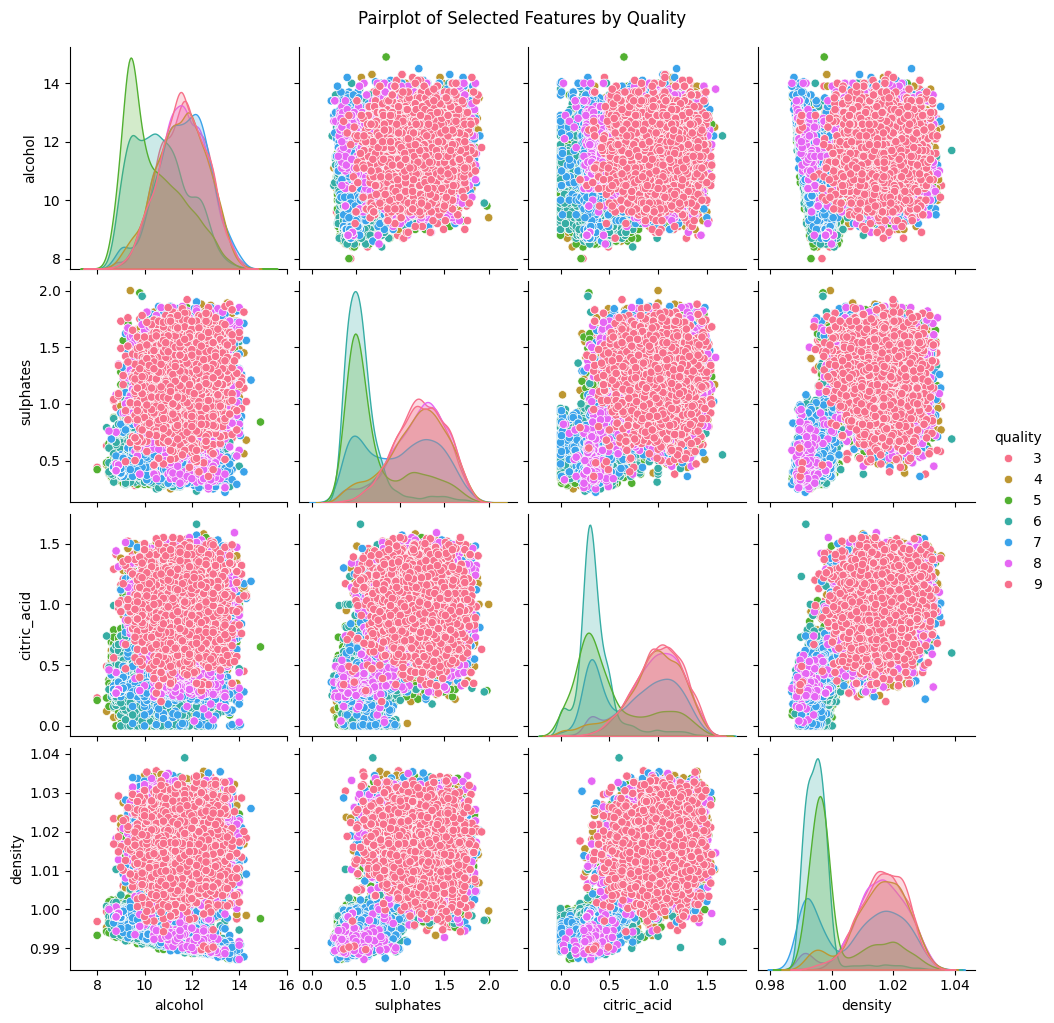

In [22]:
# Pairplot untuk beberapa fitur yang paling berpengaruh
selected_features = ['alcohol', 'sulphates', 'citric_acid', 'density', 'quality']
sns.pairplot(df[selected_features], hue='quality', palette='husl', diag_kind='kde')
plt.suptitle('Pairplot of Selected Features by Quality', y=1.02)
plt.show()

Berikut adalah pairplot menampilkan grafik scatterplot antara setiap pasangan fitur, sehingga kita bisa melihat hubungan dan pola antar fitur secara dua per dua. Di bagian diagonal, ditampilkan kurva kepadatan (KDE) yang memperlihatkan distribusi masing-masing fitur. Visualisasi ini membantu memahami korelasi antar fitur sekaligus bagaimana fitur-fitur tersebut berhubungan dengan kualitas anggur secara simultan.

## 7. Data Cleaning

In [23]:
X = df_clean.drop("quality", axis=1)  # fitur (numerik)
y = df_clean["quality"]               # target (kategorikal)

Kode tersebut memisahkan data menjadi fitur dan target. Variabel `X` berisi semua kolom kecuali `quality`, yang digunakan sebagai fitur input, sedangkan `y` hanya berisi kolom `quality` sebagai target atau label yang ingin diprediksi. Dengan demikian, `X` adalah data numerik untuk analisis, dan `y` adalah nilai kualitas anggur yang menjadi fokus prediksi.


## 8. Train-Test-Split

In [24]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

total_data = len(X)
print(f"Jumlah total dataset: {total_data}")
print(f"Jumlah data latih: {X_train.shape[0]}")
print(f"Jumlah data uji: {X_test.shape[0]}")

Jumlah total dataset: 20889
Jumlah data latih: 16711
Jumlah data uji: 4178


Kode dan output tersebut membagi dataset menjadi dua bagian: data latih (training) dan data uji (testing). Sebanyak 80% data (16.711 baris) digunakan untuk melatih model, dan 20% sisanya (4.178 baris) digunakan untuk menguji performa model. Pembagian ini dilakukan secara acak namun tetap menjaga proporsi kelas target (`quality`) sama pada kedua subset dengan menggunakan parameter `stratify=y`. Total data yang digunakan adalah 20.889 baris setelah pembersihan data.


In [25]:
# Normalisasi (Standardisasi)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Kode ini melakukan standarisasi data fitur pada dataset latih dan uji menggunakan `StandardScaler`. Dengan standarisasi, setiap fitur diubah sehingga memiliki rata-rata nol dan standar deviasi satu. Ini penting supaya model machine learning tidak bias terhadap fitur dengan skala besar dan bisa belajar dengan lebih baik serta stabil. Proses `fit_transform` diterapkan pada data latih untuk menghitung parameter standarisasi, kemudian `transform` diterapkan ke data uji agar menggunakan skala yang sama.


In [26]:
# Final Output
print("\n=== Data Shapes ===")
print(f"X_train: {X_train_scaled.shape}")
print(f"X_test: {X_test_scaled.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")


=== Data Shapes ===
X_train: (16711, 11)
X_test: (4178, 11)
y_train: (16711,)
y_test: (4178,)


Kode dan output ini menampilkan ukuran (shape) dari data setelah split dan standarisasi. `X_train` dan `X_test` masing-masing memiliki 11 fitur dan jumlah baris sesuai data latih dan uji. Sedangkan `y_train` dan `y_test` berisi label target dengan jumlah yang sama seperti data fitur latih dan uji. Ini memastikan data sudah siap untuk proses pelatihan model.

## 9. Model Development

In [27]:
!pip install lazypredict

In [28]:
from lazypredict.Supervised import LazyClassifier

klasifikasi_otomatis = LazyClassifier(verbose=0, ignore_warnings=True)
hasil_model, hasil_prediksi = klasifikasi_otomatis.fit(X_train, X_test, y_train, y_test)
print(hasil_model.sort_values("Accuracy", ascending=False))

  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002005 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2047
[LightGBM] [Info] Number of data points in the train set: 16711, number of used features: 11
[LightGBM] [Info] Start training from score -1.941849
[LightGBM] [Info] Start training from score -1.944355
[LightGBM] [Info] Start training from score -1.948967
[LightGBM] [Info] Start training from score -1.949807
[LightGBM] [Info] Start training from score -1.947707
[LightGBM] [Info] Start training from score -1.942684
[LightGBM] [Info] Start training from score -1.946030
                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
RandomForestClassifier             0.62               0.62    None      0.62   
ExtraTreesClassifier               0.62               0.62    None      0.62   
BaggingClassi

Kesimpulannya adalah menghasilkan evaluasi yaitu:

1. Model RandomForestClassifier adalah model yang memiliki akurasi paling tinggi dibandingkan model yang lain yaitu 0.62.
2. Model DecisionTreeClassifier juga menghasilkan akurasi yang tinggi yaitu 0.60.   
3. Model Perceptron memiliki urutan akurasi 2 terendah yaitu menghasilkan 0.24.
4. Model DummyClassifier adalah model yang paling kecil akurasi nya yaitu 0.14.

Selain model beberapa model yang disebutkan masih banyak lagi model-model yang lainnya. Dan juga selain akurasi, terdapat Balanced Accuracy, ROC, AUC, F1, Score dan Time Taken.


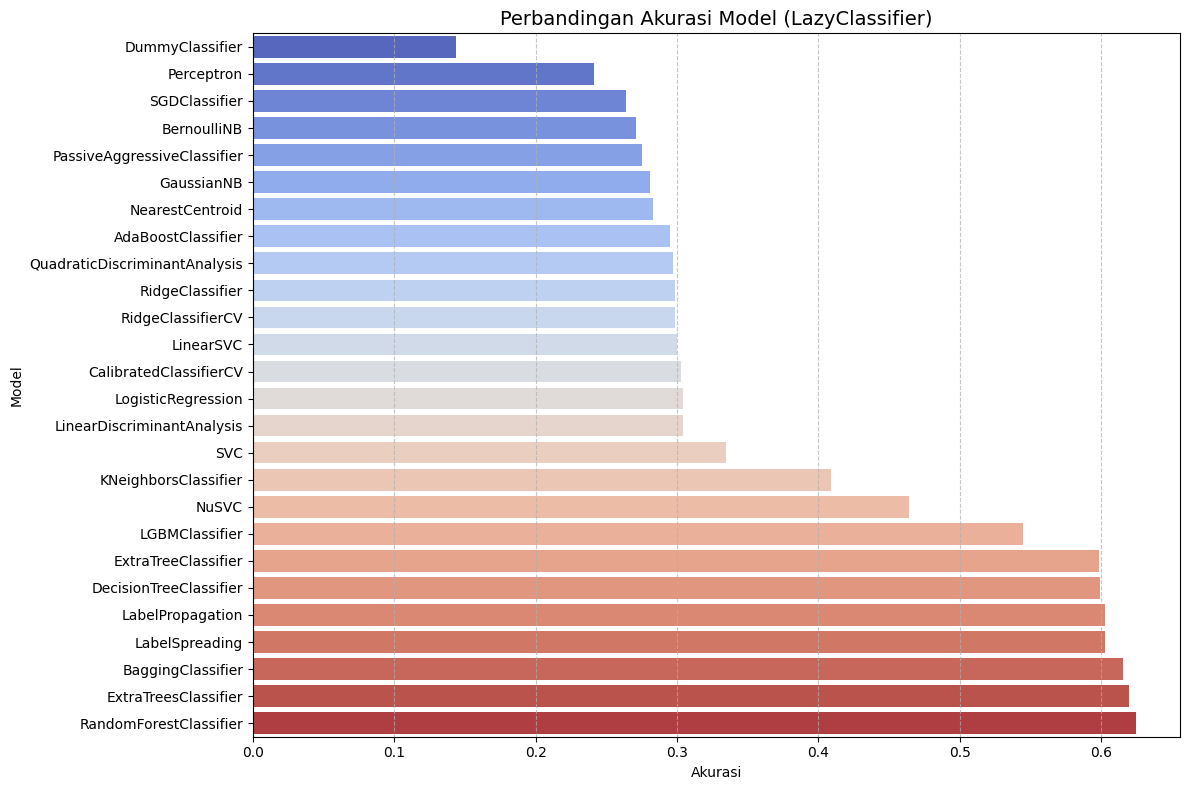

In [29]:
plt.figure(figsize=(12, 8))
sorted_results = hasil_model.sort_values(by='Accuracy', ascending=True)

# Buat barplot dengan palet warna yang berbeda
sns.barplot(
    x=sorted_results['Accuracy'],
    y=sorted_results.index,
    palette='coolwarm'
)

plt.title('Perbandingan Akurasi Model (LazyClassifier)', fontsize=14)
plt.xlabel('Akurasi')
plt.ylabel('Model')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Dapat dilihat dari Perbandingan Akurasi Model (LazyClassifier) ini didapatkan model yang memiliki akurasi tinggi yaitu RandomForestClassifier dan model yang memiliki akurasi paling rendah yaitu DummyClassifier.

In [30]:
models = pd.DataFrame(index=['accuracy_score'],
                      columns=['RandomForestClassifier', 'ExtraTreesClassifier', 'DecisionTreeClassifier', 'BaggingClassifier', 'LGBMCClassifier'])

Disini memilih 5 model yaitu:

1. RandomForestClassifier
2. ExtraTreesClassifier
3. DecisionTreeClassifier
4. BaggingClassifier
5. LGBMCClassifier

## 10. Modeling

- RandomForestClassifier

In [31]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

Pada tahap ini digunakan untuk membuat dan melatih model Random Forest Classifier pada data pelatihan. Pertama, dibuat objek model Random Forest dengan 100 pohon keputusan (n\_estimators=100) dan pengaturan random\_state=42 agar hasil pelatihan dapat direproduksi secara konsisten. Selanjutnya, model tersebut dilatih menggunakan data fitur yang sudah diskalakan (`X_train_scaled`) beserta label targetnya (`y_train`). Proses pelatihan ini memungkinkan model untuk mempelajari pola dari data sehingga nantinya dapat digunakan untuk melakukan prediksi pada data baru.


In [32]:
# Menggunakan model RandomForestClassifier untuk memprediksi data uji
rf_pred = model_rf.predict(X_test_scaled)
# Menyimpan skor akurasi ke dalam dictionary 'models'
models['RandomForestClassifier_accuracy'] = accuracy_score(y_test, rf_pred)

Kode tersebut digunakan untuk melakukan prediksi dan evaluasi model Random Forest yang sudah dilatih sebelumnya. Pertama, model RandomForestClassifier digunakan untuk memprediksi label pada data uji yang sudah diskalakan (`X_test_scaled`) dengan memanggil metode `predict`, kemudian hasil prediksi disimpan dalam variabel `rf_pred`. Selanjutnya, akurasi prediksi tersebut dihitung dengan membandingkan hasil prediksi `rf_pred` dengan label sebenarnya `y_test` menggunakan fungsi `accuracy_score`. Nilai akurasi yang didapat kemudian disimpan dalam sebuah dictionary bernama `models` dengan kunci `'RandomForestClassifier_accuracy'`, sehingga hasil evaluasi performa model ini dapat dengan mudah diakses dan dibandingkan dengan model lain.

- ExtraTreesClassifier

In [33]:
model_et = ExtraTreesClassifier(n_estimators=100, random_state=42)
model_et.fit(X_train_scaled, y_train)

ExtraTreesClassifier(random_state=42)

Pada tahap ini digunakan untuk membuat dan melatih model Extra Trees Classifier pada data pelatihan. Pertama, objek model Extra Trees dibuat dengan menggunakan 100 pohon keputusan (`n_estimators=100`) dan pengaturan `random_state=42` agar hasil pelatihan dapat direproduksi secara konsisten. Setelah itu, model tersebut dilatih dengan menggunakan data fitur yang telah diskalakan (`X_train_scaled`) beserta label targetnya (`y_train`). Proses pelatihan ini memungkinkan model Extra Trees untuk mempelajari pola dari data pelatihan sehingga nantinya dapat digunakan untuk melakukan prediksi pada data baru.


In [34]:
# Menggunakan model ExtraTreesClassifier untuk memprediksi data uji
et_pred = model_et.predict(X_test_scaled)
# Menyimpan skor akurasi ke dalam dictionary 'models'
models['ExtraTreesClassifier_accuracy'] = accuracy_score(y_test, et_pred)

Kode ini digunakan untuk melakukan prediksi dan evaluasi model Extra Trees Classifier yang telah dilatih sebelumnya. Pertama, model Extra Trees digunakan untuk memprediksi label pada data uji yang sudah diskalakan (`X_test_scaled`) dengan memanggil metode `predict`, dan hasil prediksi tersebut disimpan dalam variabel `et_pred`. Selanjutnya, akurasi dari prediksi ini dihitung dengan membandingkan hasil prediksi `et_pred` dengan label sebenarnya `y_test` menggunakan fungsi `accuracy_score`. Nilai akurasi yang diperoleh kemudian disimpan dalam sebuah dictionary bernama `models` dengan kunci `'ExtraTreesClassifier_accuracy'`, sehingga memudahkan pengelolaan dan perbandingan performa model dengan model-model lain.

- DecisionTreeClassifier

In [35]:
model_dt = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=42)
model_dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

Pada tahap ini digunakan untuk membuat dan melatih model Decision Tree Classifier pada data pelatihan. Model Decision Tree dibuat dengan menggunakan kriteria pemisahan berdasarkan indeks Gini (`criterion='gini'`), tanpa batasan kedalaman pohon (`max_depth=None`), dan dengan pengaturan `random_state=42` agar hasil pelatihan dapat direproduksi secara konsisten. Setelah itu, model tersebut dilatih menggunakan data fitur yang sudah diskalakan (`X_train_scaled`) beserta label targetnya (`y_train`). Proses pelatihan ini memungkinkan model Decision Tree untuk mempelajari pola dari data pelatihan sehingga dapat digunakan untuk melakukan prediksi pada data uji atau data baru nantinya.


In [36]:
# Menggunakan model Decision Tree untuk memprediksi data uji
dt_pred = model_dt.predict(X_test_scaled)
# Menyimpan skor akurasi ke dalam dictionary 'models'
models['DecisionTreeClassifier_accuracy'] = accuracy_score(y_test, dt_pred)

Kode ini digunakan untuk melakukan prediksi dan evaluasi model Decision Tree yang telah dilatih sebelumnya. Pertama, model Decision Tree digunakan untuk memprediksi label pada data uji yang sudah diskalakan (`X_test_scaled`) dengan memanggil metode `predict`, dan hasil prediksi disimpan dalam variabel `dt_pred`. Kemudian, akurasi prediksi dihitung dengan membandingkan hasil prediksi `dt_pred` dengan label sebenarnya `y_test` menggunakan fungsi `accuracy_score`. Nilai akurasi yang diperoleh disimpan dalam dictionary bernama `models` dengan kunci `'DecisionTreeClassifier_accuracy'`, sehingga hasil evaluasi performa model ini dapat dengan mudah disimpan dan dibandingkan dengan model lain.

- BaggingClassifier

In [37]:
# BaggingClassifier
model_bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50,
    random_state=42
)
model_bagging.fit(X_train_scaled, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50,
                  random_state=42)

Pada tahap ini digunakan untuk membuat dan melatih model BaggingClassifier yang menggunakan Decision Tree sebagai estimator dasar. Model Bagging dibuat dengan menggabungkan 50 pohon keputusan (`n_estimators=50`) untuk membentuk ensemble yang lebih kuat dan stabil, serta menggunakan `random_state=42` agar hasil pelatihan dapat direproduksi. Estimator dasar yang digunakan adalah `DecisionTreeClassifier` standar tanpa parameter khusus. Setelah itu, model Bagging dilatih menggunakan data fitur yang sudah diskalakan (`X_train_scaled`) dan label targetnya (`y_train`). Dengan cara ini, model belajar pola dari data pelatihan dan diharapkan mampu mengurangi overfitting yang biasanya terjadi pada pohon keputusan tunggal, sehingga menghasilkan prediksi yang lebih akurat dan andal.


In [38]:
# Menggunakan model BaggingClassifier untuk memprediksi data uji
bagging_pred = model_bagging.predict(X_test_scaled)
# Menyimpan skor akurasi ke dalam dictionary 'models'
models['BaggingClassifier_accuracy'] = accuracy_score(y_test, bagging_pred)

Kode ini digunakan untuk melakukan prediksi dan evaluasi model BaggingClassifier yang telah dilatih sebelumnya. Model Bagging digunakan untuk memprediksi label pada data uji yang sudah diskalakan (`X_test_scaled`) dengan memanggil metode `predict`, dan hasil prediksi disimpan dalam variabel `bagging_pred`. Selanjutnya, akurasi prediksi dihitung dengan membandingkan hasil prediksi `bagging_pred` dengan label sebenarnya `y_test` menggunakan fungsi `accuracy_score`. Nilai akurasi yang diperoleh kemudian disimpan dalam dictionary bernama `models` dengan kunci `'BaggingClassifier_accuracy'`, sehingga memudahkan penyimpanan dan perbandingan performa model ini dengan model-model lain yang diuji.


- LGBMClassifier

In [39]:
# Inisialisasi model LightGBM dengan parameter yang diberikan
model_lgb = LGBMClassifier(
    boosting_type='gbdt',
    num_leaves=31,
    learning_rate=0.1,
    n_estimators=100,
    random_state=42
)
model_lgb.fit(X_train_scaled, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002041 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2047
[LightGBM] [Info] Number of data points in the train set: 16711, number of used features: 11
[LightGBM] [Info] Start training from score -1.941849
[LightGBM] [Info] Start training from score -1.944355
[LightGBM] [Info] Start training from score -1.948967
[LightGBM] [Info] Start training from score -1.949807
[LightGBM] [Info] Start training from score -1.947707
[LightGBM] [Info] Start training from score -1.942684
[LightGBM] [Info] Start training from score -1.946030


LGBMClassifier(random_state=42)

Pada tahap ini digunakan untuk menginisialisasi dan melatih model LightGBM (Light Gradient Boosting Machine) dengan parameter tertentu. Model dibuat menggunakan metode boosting tipe `gbdt` (Gradient Boosting Decision Tree) dengan jumlah daun pohon maksimum sebanyak 31 (`num_leaves=31`), laju pembelajaran sebesar 0.1 (`learning_rate=0.1`), dan jumlah estimators atau pohon sebanyak 100 (`n_estimators=100`). Pengaturan `random_state=42` digunakan agar hasil pelatihan dapat direproduksi secara konsisten. Setelah model diinisialisasi, proses pelatihan dilakukan dengan menggunakan data fitur yang sudah diskalakan (`X_train_scaled`) dan label targetnya (`y_train`), sehingga model dapat mempelajari pola dari data pelatihan untuk digunakan dalam prediksi data baru.


In [40]:
# Menggunakan model LightGBM untuk memprediksi data uji
lgb_pred = model_lgb.predict(X_test_scaled)
# Menyimpan skor akurasi ke dalam dictionary 'models'
models['LGBMClassifier_accuracy'] = accuracy_score(y_test, lgb_pred)

Kode ini digunakan untuk melakukan prediksi dan evaluasi model LightGBM yang telah dilatih sebelumnya. Model LightGBM digunakan untuk memprediksi label pada data uji yang sudah diskalakan (`X_test_scaled`) dengan memanggil metode `predict`, dan hasil prediksi disimpan dalam variabel `lgb_pred`. Selanjutnya, akurasi prediksi dihitung dengan membandingkan hasil prediksi `lgb_pred` dengan label sebenarnya `y_test` menggunakan fungsi `accuracy_score`. Nilai akurasi yang diperoleh kemudian disimpan dalam dictionary bernama `models` dengan kunci `'LGBMClassifier_accuracy'`, sehingga memudahkan penyimpanan dan perbandingan performa model LightGBM dengan model-model lain yang diuji.


## 11. Inisiasi Model Klasifikasi

In [41]:
# Inisialisasi model
models = {
    'RandomForest' : model_rf,
    'ExtraTrees'   : model_et,
    'DecisionTree' : model_dt,
    'Bagging'      : model_bagging,
    'LGBM'         : model_lgb
}

## 12. Evaluasi Model


===== Evaluasi Model: RandomForest =====
Accuracy  : 0.6245
Precision : 0.6359
Recall    : 0.6245
F1 Score  : 0.6230

Classification Report:
              precision    recall  f1-score   support

           3       0.55      0.69      0.61       599
           4       0.59      0.58      0.58       598
           5       0.74      0.58      0.65       595
           6       0.64      0.74      0.69       594
           7       0.72      0.47      0.57       596
           8       0.61      0.65      0.63       599
           9       0.60      0.66      0.63       597

    accuracy                           0.62      4178
   macro avg       0.64      0.62      0.62      4178
weighted avg       0.64      0.62      0.62      4178



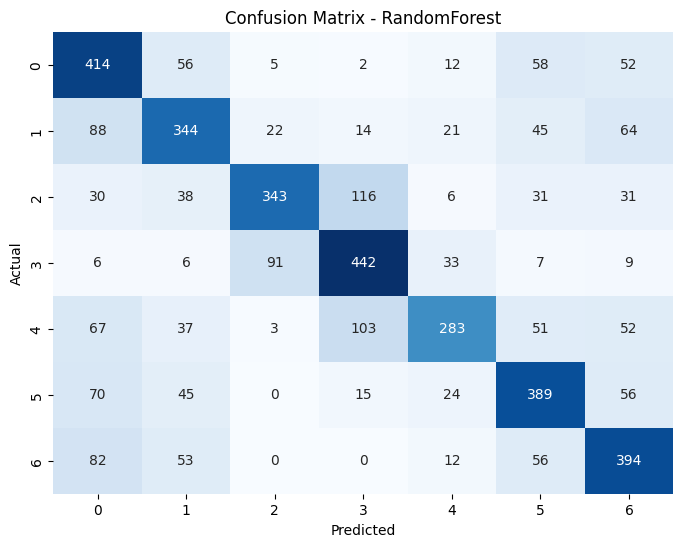


===== Evaluasi Model: ExtraTrees =====
Accuracy  : 0.6197
Precision : 0.6288
Recall    : 0.6197
F1 Score  : 0.6184

Classification Report:
              precision    recall  f1-score   support

           3       0.56      0.67      0.61       599
           4       0.57      0.59      0.58       598
           5       0.73      0.58      0.65       595
           6       0.64      0.73      0.68       594
           7       0.70      0.48      0.57       596
           8       0.62      0.62      0.62       599
           9       0.58      0.66      0.62       597

    accuracy                           0.62      4178
   macro avg       0.63      0.62      0.62      4178
weighted avg       0.63      0.62      0.62      4178



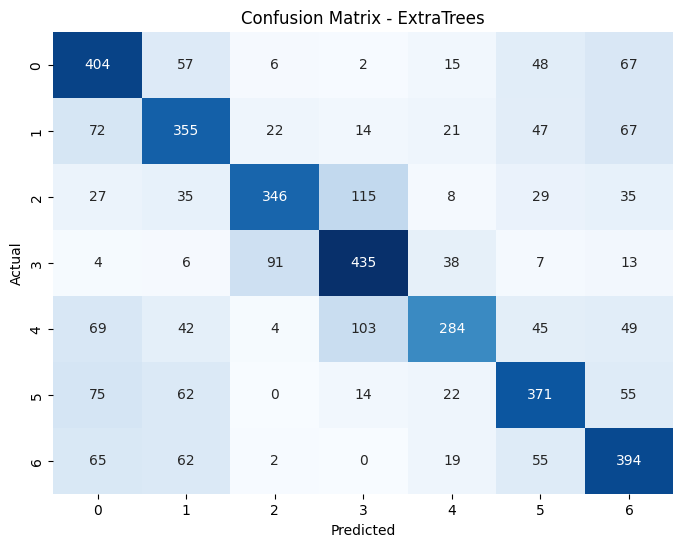


===== Evaluasi Model: DecisionTree =====
Accuracy  : 0.5989
Precision : 0.5987
Recall    : 0.5989
F1 Score  : 0.5986

Classification Report:
              precision    recall  f1-score   support

           3       0.65      0.65      0.65       599
           4       0.56      0.58      0.57       598
           5       0.57      0.55      0.56       595
           6       0.61      0.58      0.59       594
           7       0.55      0.54      0.55       596
           8       0.62      0.65      0.63       599
           9       0.63      0.64      0.63       597

    accuracy                           0.60      4178
   macro avg       0.60      0.60      0.60      4178
weighted avg       0.60      0.60      0.60      4178



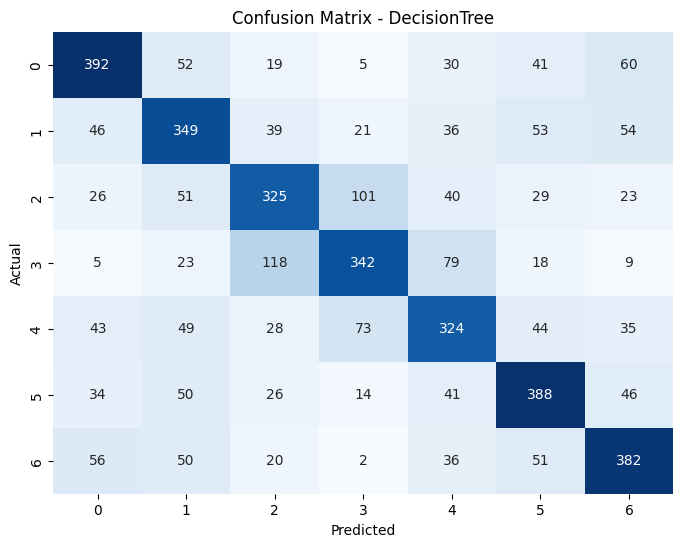


===== Evaluasi Model: Bagging =====
Accuracy  : 0.6206
Precision : 0.6273
Recall    : 0.6206
F1 Score  : 0.6196

Classification Report:
              precision    recall  f1-score   support

           3       0.55      0.66      0.60       599
           4       0.59      0.60      0.59       598
           5       0.72      0.57      0.63       595
           6       0.64      0.71      0.67       594
           7       0.67      0.50      0.57       596
           8       0.62      0.64      0.63       599
           9       0.61      0.67      0.64       597

    accuracy                           0.62      4178
   macro avg       0.63      0.62      0.62      4178
weighted avg       0.63      0.62      0.62      4178



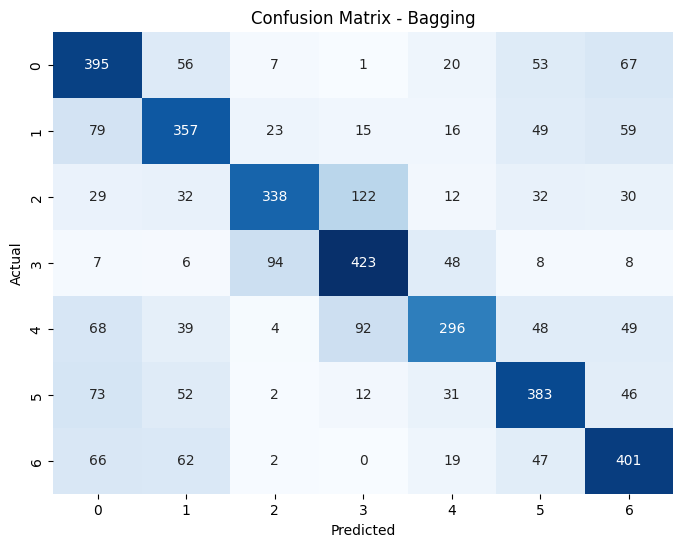


===== Evaluasi Model: LGBM =====
Accuracy  : 0.5450
Precision : 0.5586
Recall    : 0.5450
F1 Score  : 0.5418

Classification Report:
              precision    recall  f1-score   support

           3       0.49      0.57      0.52       599
           4       0.52      0.52      0.52       598
           5       0.68      0.51      0.58       595
           6       0.62      0.71      0.66       594
           7       0.63      0.35      0.45       596
           8       0.49      0.54      0.51       599
           9       0.49      0.63      0.55       597

    accuracy                           0.54      4178
   macro avg       0.56      0.55      0.54      4178
weighted avg       0.56      0.54      0.54      4178



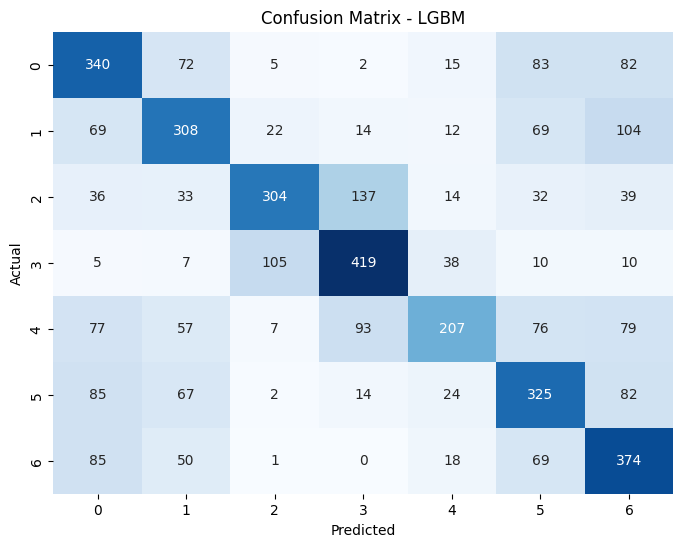

In [42]:
# Simpan skor akurasi dalam dictionary terpisah untuk plotting nanti
accuracy_scores = {}

# Loop evaluasi model
for name, model in models.items():

    # Lakukan prediksi menggunakan data uji yang sudah diskalakan
    y_pred = model.predict(X_test_scaled)

    print(f"\n===== Evaluasi Model: {name} =====")

    # Hitung dan cetak metrik evaluasi
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"Accuracy  : {accuracy:.4f}")
    print(f"Precision : {precision:.4f}")
    print(f"Recall    : {recall:.4f}")
    print(f"F1 Score  : {f1:.4f}")

    # Simpan akurasi untuk plotting
    accuracy_scores[name] = accuracy

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Visualisasi Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6)) # Ukuran confusion matrix yang lebih besar
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

Dari kode dan output diatas dapat disimpulkan bahwa:

1. Model RandomForest
- Memiliki Akurasi: 62.45%.
- Memiliki F1-score rata-rata tertimbang (weighted avg): 62%.
- Performa paling tinggi dari semua model (dalam hal akurasi)
- F1-score relatif merata di semua kelas.

2. Model ExtraTrees
- Memiliki Akurasi: 61.97%.
- Memiliki F1-score rata-rata tertimbang: 62%.
- Hampir setara dengan RandomForest  
- Kelas 3 (recall 0.67), 6(recall 0.73), dan 9(recall 0.66) memiliki recall yang cukup tinggi.

3. Model DecisionTree
- Memiliki Akurasi: 59.88%.
- Memiliki F1-score rata-rata tertimbang: 60%.
- Cukup seimbang dalam precision dan recall antar kelas.
- Performa cenderung lebih rendah dibanding model ensemble (RF, ET, Bagging).

4. Model Bagging
- Memiliki Akurasi: 61.56%.
- Memiliki F1-score rata-rata tertimbang: 61%.
- Hampir setara dengan RandomForest dan ExtraTrees.
- Bagging bisa mengurangi overfitting dari pohon tunggal.

5. Model LGBM (LightGBM)
- Memiliki Akurasi: 54.50%.
- Memiliki F1-score rata-rata tertimbang: 54%.
- Performa cukup baik di kelas 6 dan 5.



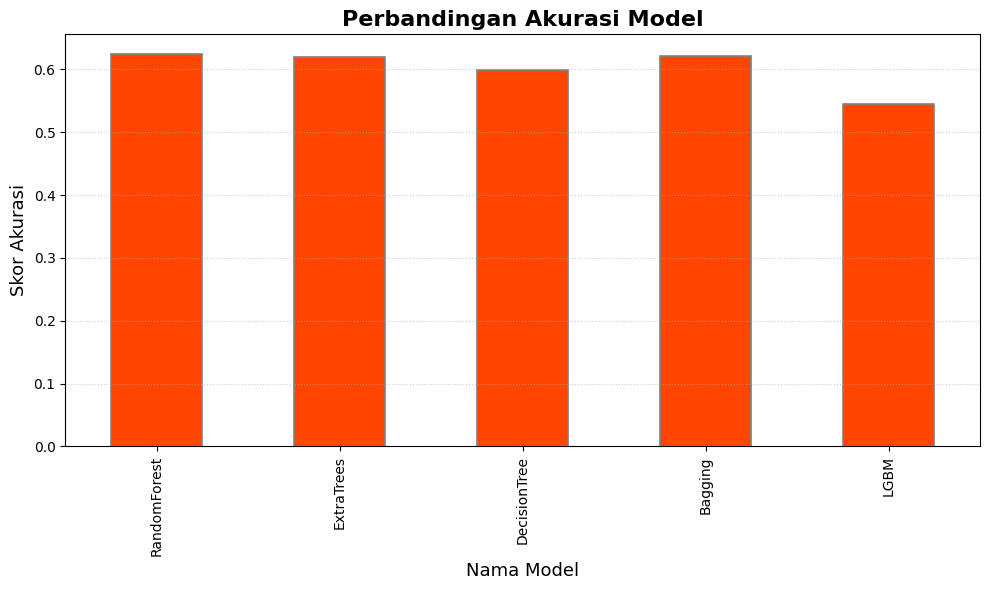

In [43]:
# Buat sebuah pandas Series dari nilai-nilai akurasi yang sudah dikumpulkan
accuracy_series = pd.Series(accuracy_scores)

plt.figure(figsize=(10, 6))
# Menggunakan Series untuk membuat plot batang
accuracy_series.plot(kind='bar', color='#FF4500', edgecolor='gray', linewidth=1.2)
plt.title('Perbandingan Akurasi Model', fontsize=16, fontweight='bold')
plt.xlabel('Nama Model', fontsize=13)
plt.ylabel('Skor Akurasi', fontsize=13)
plt.grid(True, axis='y', linestyle=':', alpha=0.6)
plt.tight_layout()
plt.show()

Grafik batang pada gambar yang Anda tampilkan berjudul "Perbandingan Akurasi Model" menunjukkan visualisasi dari skor akurasi lima model klasifikasi yaitu RandomForest, ExtraTrees, DecisionTree, Bagging, dan LGBM. Selain itu Model ensemble berbasis pohon (RandomForest, ExtraTrees, Bagging) memberikan performa terbaik dalam hal akurasi. Model tunggal seperti DecisionTree lebih lemah. Model boosting seperti LGBM dalam kasus ini memiliki performa terendah.